<a href="https://colab.research.google.com/github/sujaldaku96/sujal/blob/main/Sujal_Shrestha_2357917.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data_AI/mental_health_dataset.csv')

# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB
Dataset Overview:
 None

Summary Statistics:
            User_ID         Ag

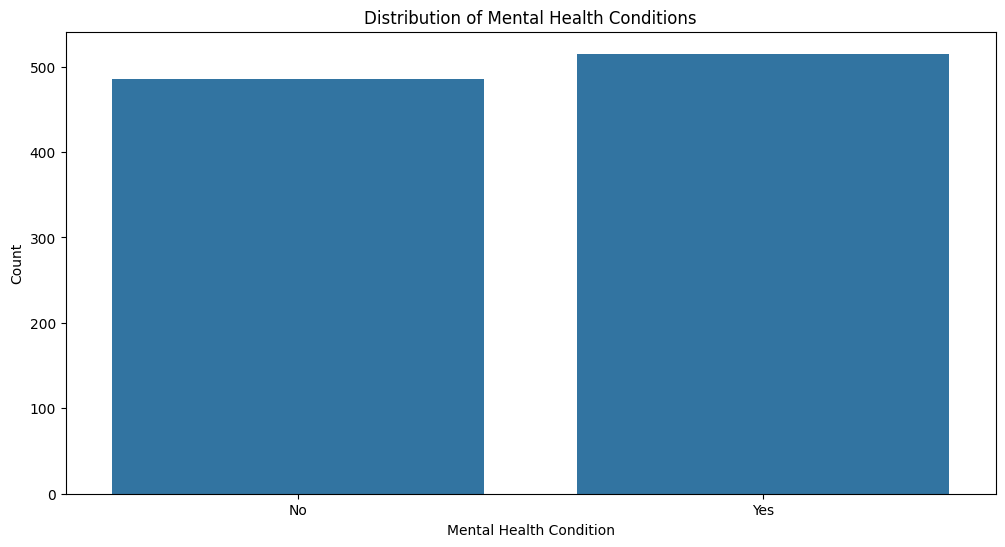

In [11]:
# 1. Distribution of Target Variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Mental_Health_Condition', data=df)
plt.title("Distribution of Mental Health Conditions")
plt.xlabel("Mental Health Condition")
plt.ylabel("Count")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB
Dataset Overview:
 None


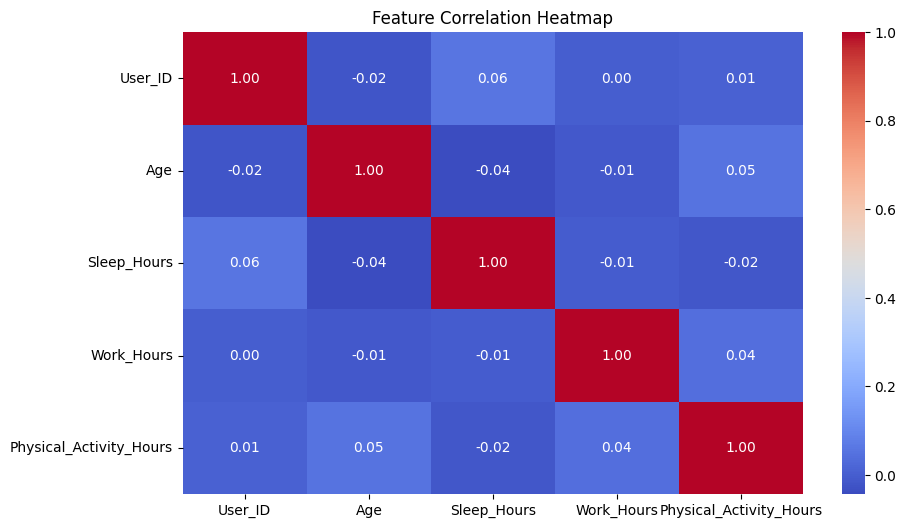

In [13]:
# Ensure you have imported necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Data_AI/mental_health_dataset.csv')

# Display basic information
print("Dataset Overview:\n", df.info())

# 2. Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


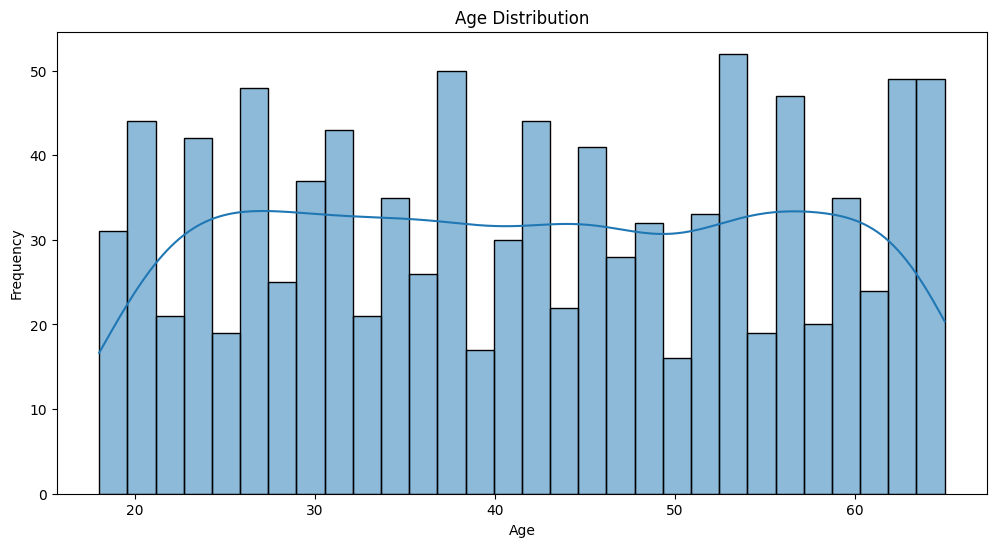

In [14]:
# 3. Feature Distributions (Example for Age)
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

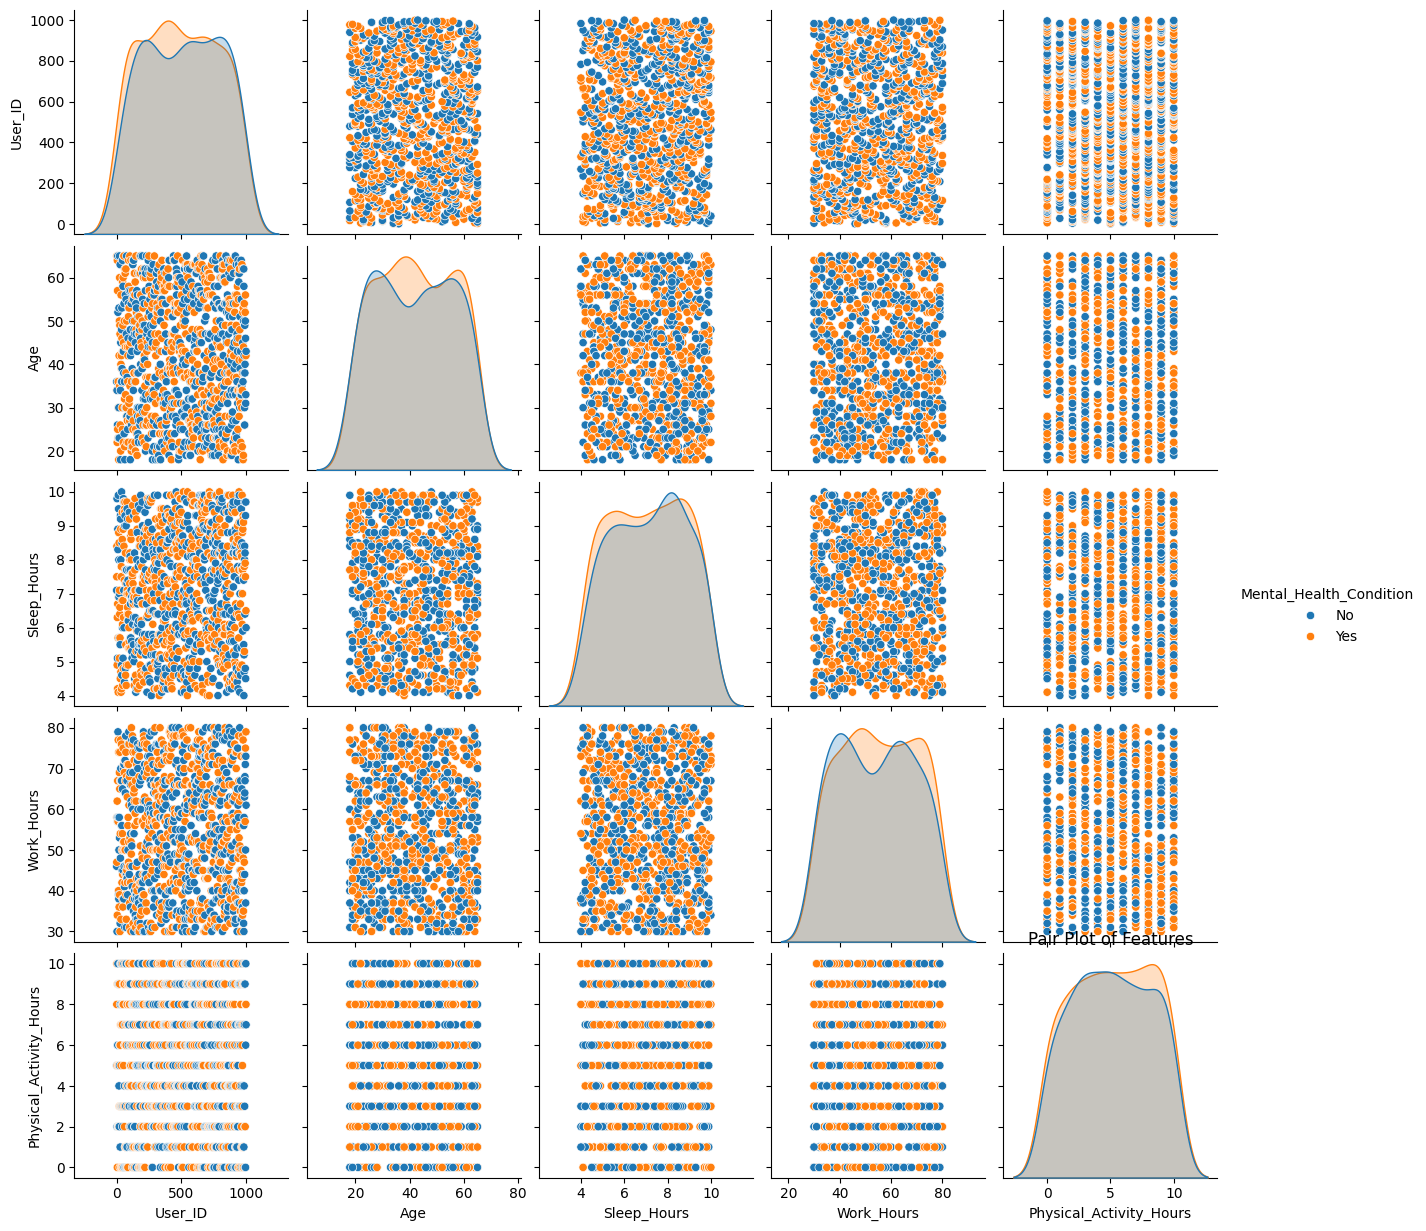

In [15]:
# 4. Pair Plot (for key features)
sns.pairplot(df, hue='Mental_Health_Condition')
plt.title("Pair Plot of Features")
plt.show()

# Data Preprocessing
df.dropna(inplace=True)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Mental_Health_Condition'])
y = df['Mental_Health_Condition']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

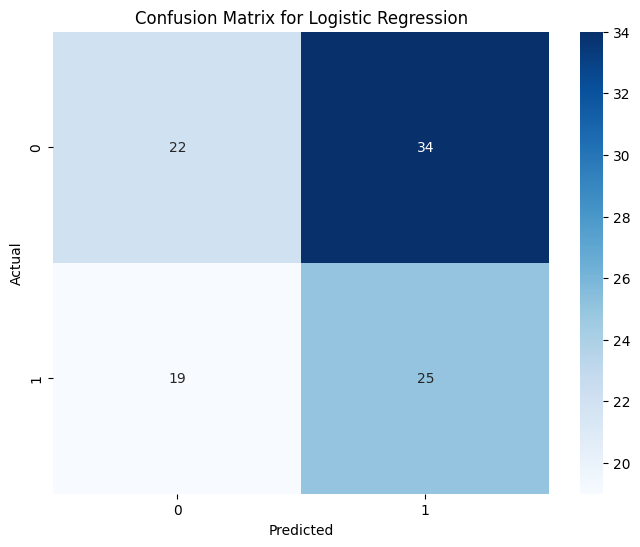

In [16]:
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

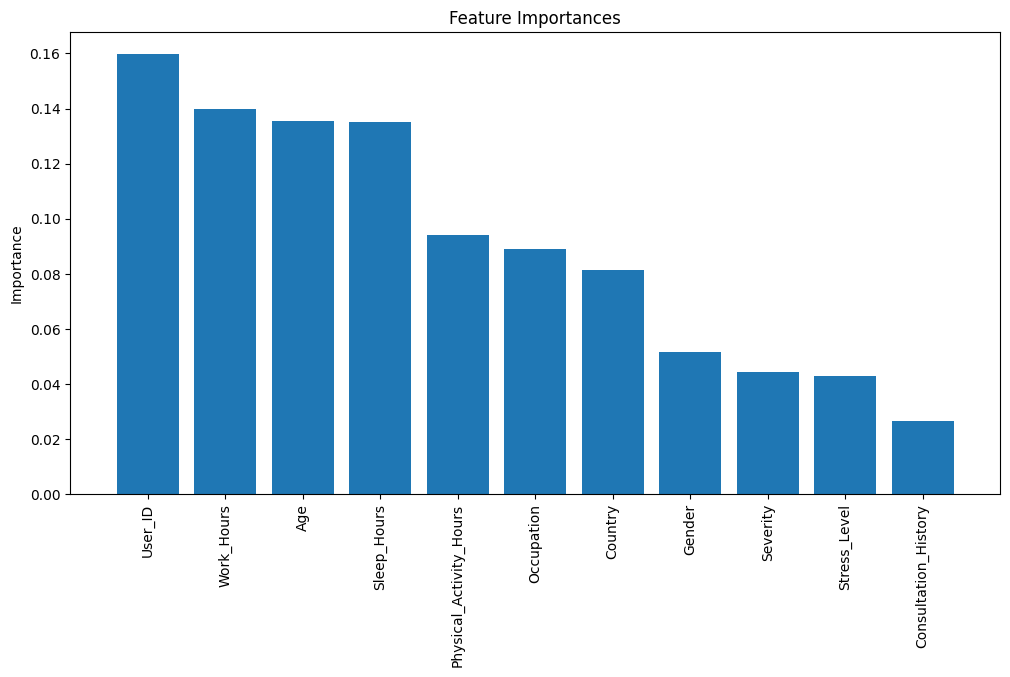

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        56
           1       0.42      0.57      0.49        44

    accuracy                           0.47       100
   macro avg       0.48      0.48      0.47       100
weighted avg       0.49      0.47      0.47       100



In [20]:
# 6. Feature Importance (for Random Forest)
import numpy as np # Import numpy library and assign it the alias 'np'
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred_logistic))